# Regresión lineal múltiple

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Cargar los archivos CSV proporcionados
train_data = pd.read_csv('data/Finaltrain.csv')

features = ['text_length', 'word_count', 'number_count', 'punctuation_count', 'stopword_count']
X = train_data[features]

y_content = train_data['content']
y_wording = train_data['wording']

X_train, X_val, y_content_train, y_content_val, y_wording_train, y_wording_val = train_test_split(
    X, y_content, y_wording, test_size=0.2, random_state=42
)

model_content = LinearRegression()
model_wording = LinearRegression()

model_content.fit(X_train, y_content_train)
model_wording.fit(X_train, y_wording_train)

y_content_pred = model_content.predict(X_val)
y_wording_pred = model_wording.predict(X_val)

content_mse = mean_squared_error(y_content_val, y_content_pred)
content_r2 = r2_score(y_content_val, y_content_pred)
content_mae = mean_absolute_error(y_content_val, y_content_pred)


wording_mse = mean_squared_error(y_wording_val, y_wording_pred)
wording_r2 = r2_score(y_wording_val, y_wording_pred)
wording_mae = mean_absolute_error(y_wording_val, y_wording_pred)

print("\nModelo para 'content':")
print(f"MSE: {content_mse}")
print(f"R^2: {content_r2}")
print(f"MAE: {content_mae}")

print("\nModelo para 'wording':")
print(f"MSE: {wording_mse}")
print(f"R^2: {wording_r2}")
print(f"MAE: {wording_mae}")


Modelo para 'content':
MSE: 0.36671437854231054
R^2: 0.6613574087586267
MAE: 0.46131275893841356

Modelo para 'wording':
MSE: 0.695998176386758
R^2: 0.316065420085737
MAE: 0.6607749479454261


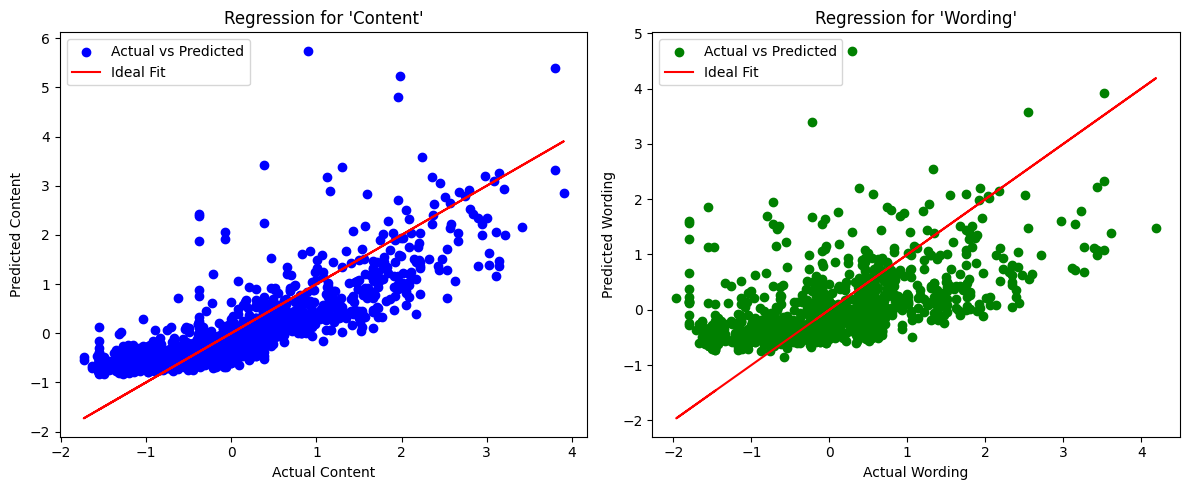

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_content_val, y_content_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_content_val, y_content_val, color='red', label='Ideal Fit')  # Línea de referencia ideal
plt.title("Regression for 'Content'")
plt.xlabel("Actual Content")
plt.ylabel("Predicted Content")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_wording_val, y_wording_pred, color='green', label='Actual vs Predicted')
plt.plot(y_wording_val, y_wording_val, color='red', label='Ideal Fit')  # Línea de referencia ideal
plt.title("Regression for 'Wording'")
plt.xlabel("Actual Wording")
plt.ylabel("Predicted Wording")
plt.legend()

plt.tight_layout()
plt.show()

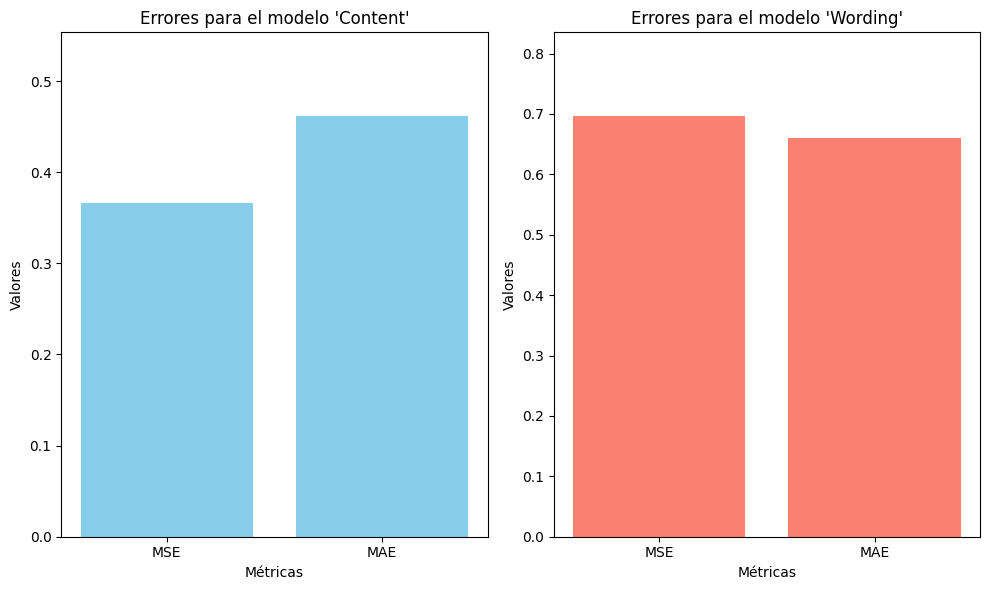

In [10]:
import matplotlib.pyplot as plt

# Definir las métricas
metrics = ['MSE', 'MAE']
content_values = [content_mse, content_mae]
wording_values = [wording_mse, wording_mae]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(metrics, content_values, color='skyblue')
plt.title("Errores para el modelo 'Content'")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.ylim(0, max(content_values) * 1.2)  

plt.subplot(1, 2, 2)
plt.bar(metrics, wording_values, color='salmon')
plt.title("Errores para el modelo 'Wording'")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.ylim(0, max(wording_values) * 1.2)  

plt.tight_layout()
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Agregar características polinómicas para mejorar el rendimiento del modelo
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_val, y_content_train, y_content_val, y_wording_train, y_wording_val = train_test_split(
    X_poly, y_content, y_wording, test_size=0.2, random_state=42
)

# Crear y entrenar modelos de regresión lineal múltiple para ambas variables objetivo
model_content = LinearRegression()
model_wording = LinearRegression()

model_content.fit(X_train, y_content_train)
model_wording.fit(X_train, y_wording_train)

# Realizar predicciones en el conjunto de validación
y_content_pred = model_content.predict(X_val)
y_wording_pred = model_wording.predict(X_val)

# Evaluar los modelos
content_mse = mean_squared_error(y_content_val, y_content_pred)
content_r2 = r2_score(y_content_val, y_content_pred)
content_mae = mean_absolute_error(y_content_val, y_content_pred)

wording_mse = mean_squared_error(y_wording_val, y_wording_pred)
wording_r2 = r2_score(y_wording_val, y_wording_pred)
wording_mae = mean_absolute_error(y_wording_val, y_wording_pred)

# Resultados de la evaluación
print("\nModelo para 'content':")
print(f"MSE: {content_mse}")
print(f"R^2: {content_r2}")
print(f"MAE: {content_mae}")

print("\nModelo para 'wording':")
print(f"MSE: {wording_mse}")
print(f"R^2: {wording_r2}")
print(f"MAE: {wording_mae}")


Modelo para 'content':
MSE: 0.27318153828059516
R^2: 0.7477303606954928
MAE: 0.40243950169124093

Modelo para 'wording':
MSE: 0.6325420926196481
R^2: 0.37842163230969805
MAE: 0.6215621230665894


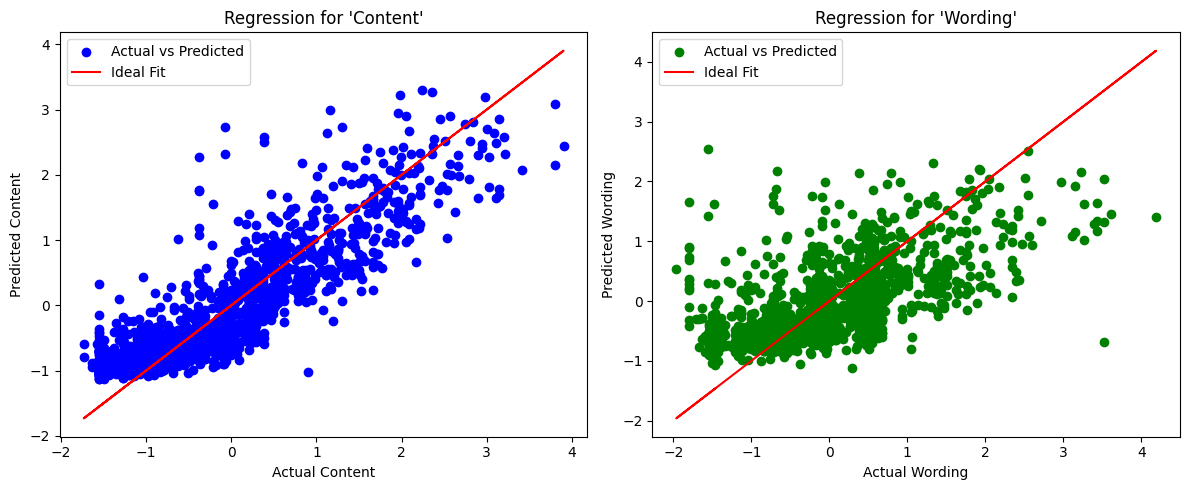

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_content_val, y_content_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_content_val, y_content_val, color='red', label='Ideal Fit')  # Línea de referencia ideal
plt.title("Regression for 'Content'")
plt.xlabel("Actual Content")
plt.ylabel("Predicted Content")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_wording_val, y_wording_pred, color='green', label='Actual vs Predicted')
plt.plot(y_wording_val, y_wording_val, color='red', label='Ideal Fit')  # Línea de referencia ideal
plt.title("Regression for 'Wording'")
plt.xlabel("Actual Wording")
plt.ylabel("Predicted Wording")
plt.legend()

plt.tight_layout()
plt.show()

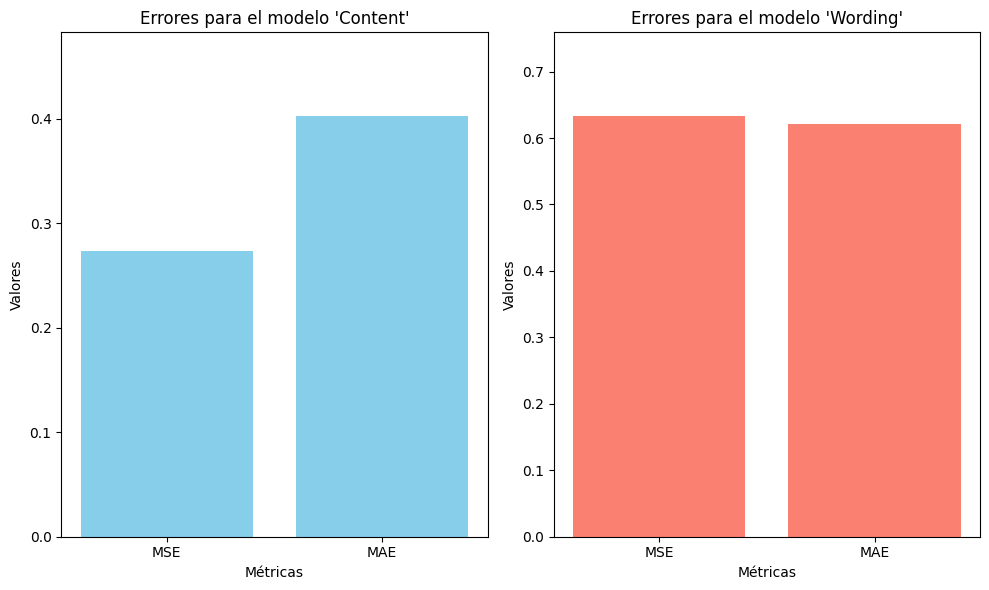

In [13]:
import matplotlib.pyplot as plt

# Definir las métricas
metrics = ['MSE', 'MAE']
content_values = [content_mse, content_mae]
wording_values = [wording_mse, wording_mae]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(metrics, content_values, color='skyblue')
plt.title("Errores para el modelo 'Content'")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.ylim(0, max(content_values) * 1.2)  

plt.subplot(1, 2, 2)
plt.bar(metrics, wording_values, color='salmon')
plt.title("Errores para el modelo 'Wording'")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.ylim(0, max(wording_values) * 1.2)  

plt.tight_layout()
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV

# Crear un pipeline para la regresión lineal con características polinómicas
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
    ('regressor', LinearRegression())
])

# Validación cruzada para el modelo de 'content'
cross_val_scores_content = cross_val_score(pipeline, X_train, y_content_train, cv=3, scoring='r2')
print("Validación cruzada (R^2) para 'content':", cross_val_scores_content)
print("Media de validación cruzada (R^2) para 'content':", cross_val_scores_content.mean())

# Validación cruzada para el modelo de 'wording'
cross_val_scores_wording = cross_val_score(pipeline, X_train, y_wording_train, cv=3, scoring='r2')
print("\nValidación cruzada (R^2) para 'wording':", cross_val_scores_wording)
print("Media de validación cruzada (R^2) para 'wording':", cross_val_scores_wording.mean())

# Búsqueda de hiperparámetros utilizando GridSearchCV
param_grid = {
    'poly_features__degree': [1, 2, 3, 4],
    'poly_features__interaction_only': [True, False],
    'regressor__fit_intercept': [True, False]
}

grid_search_content = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search_content.fit(X_train, y_content_train)
print("\nMejores hiperparámetros para 'content':", grid_search_content.best_params_)

# Ajustar el pipeline con los mejores parámetros
best_pipeline_content = grid_search_content.best_estimator_
best_pipeline_content.fit(X_train, y_content_train)

# Realizar predicciones y evaluar el modelo ajustado para 'content'
y_content_pred = best_pipeline_content.predict(X_val)
content_mse = mean_squared_error(y_content_val, y_content_pred)
content_r2 = r2_score(y_content_val, y_content_pred)

print("\nModelo ajustado para 'content':")
print(f"MSE: {content_mse}")
print(f"R^2: {content_r2}")
print(f"MAE: {mean_absolute_error(y_content_val, y_content_pred)}")

# Búsqueda de hiperparámetros para 'wording'
grid_search_wording = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search_wording.fit(X_train, y_wording_train)
print("\nMejores hiperparámetros para 'wording':", grid_search_wording.best_params_)

# Ajustar el pipeline con los mejores parámetros
best_pipeline_wording = grid_search_wording.best_estimator_
best_pipeline_wording.fit(X_train, y_wording_train)

# Realizar predicciones y evaluar el modelo ajustado para 'wording'
y_wording_pred = best_pipeline_wording.predict(X_val)
wording_mse = mean_squared_error(y_wording_val, y_wording_pred)
wording_r2 = r2_score(y_wording_val, y_wording_pred)

print("\nModelo ajustado para 'wording':")
print(f"MSE: {wording_mse}")
print(f"R^2: {wording_r2}")
print(f"MAE: {mean_absolute_error(y_wording_val, y_wording_pred)}")

Validación cruzada (R^2) para 'content': [ 2.08226889e-02 -8.62223210e+01 -7.76467972e+00]
Media de validación cruzada (R^2) para 'content': -31.322059337427238

Validación cruzada (R^2) para 'wording': [  -2.09456862 -196.57017376  -40.82759418]
Media de validación cruzada (R^2) para 'wording': -79.83077885205834

Mejores hiperparámetros para 'content': {'poly_features__degree': 1, 'poly_features__interaction_only': True, 'regressor__fit_intercept': True}

Modelo ajustado para 'content':
MSE: 0.2731815382805951
R^2: 0.7477303606954928
MAE: 0.40243950169124076

Mejores hiperparámetros para 'wording': {'poly_features__degree': 1, 'poly_features__interaction_only': True, 'regressor__fit_intercept': True}

Modelo ajustado para 'wording':
MSE: 0.6325420926196493
R^2: 0.37842163230969683
MAE: 0.6215621230665901


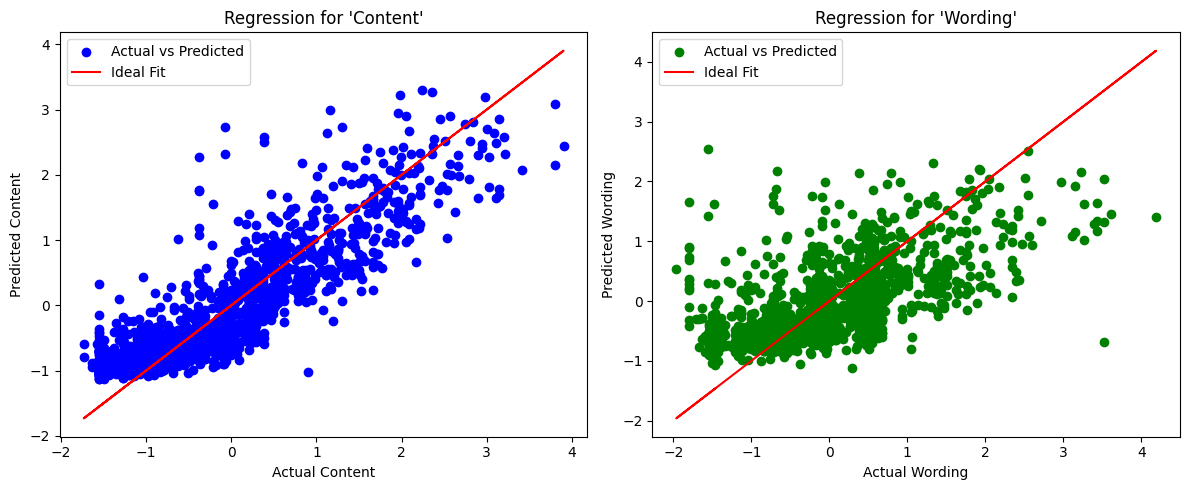

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_content_val, y_content_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_content_val, y_content_val, color='red', label='Ideal Fit')  # Línea de referencia ideal
plt.title("Regression for 'Content'")
plt.xlabel("Actual Content")
plt.ylabel("Predicted Content")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_wording_val, y_wording_pred, color='green', label='Actual vs Predicted')
plt.plot(y_wording_val, y_wording_val, color='red', label='Ideal Fit')  # Línea de referencia ideal
plt.title("Regression for 'Wording'")
plt.xlabel("Actual Wording")
plt.ylabel("Predicted Wording")
plt.legend()

plt.tight_layout()
plt.show()

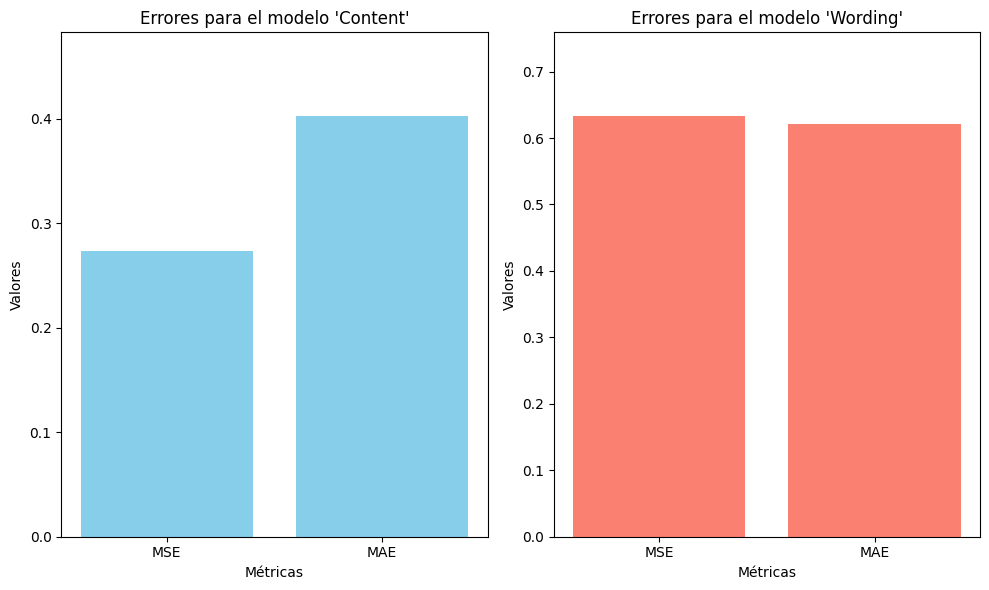

In [16]:
import matplotlib.pyplot as plt

# Definir las métricas
metrics = ['MSE', 'MAE']
content_values = [content_mse, content_mae]
wording_values = [wording_mse, wording_mae]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(metrics, content_values, color='skyblue')
plt.title("Errores para el modelo 'Content'")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.ylim(0, max(content_values) * 1.2)  

plt.subplot(1, 2, 2)
plt.bar(metrics, wording_values, color='salmon')
plt.title("Errores para el modelo 'Wording'")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.ylim(0, max(wording_values) * 1.2)  

plt.tight_layout()
plt.show()